# Проект "A/B тестирование крупного интернет-магазина"

## Описание проекта
### Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

### Часть 1. Приоритизация гипотез.
В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
#### Задача
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


### Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
#### Задача
Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

## Описание данных
### Данные для первой части
Файл `/datasets/hypothesis.csv`:  <br>
`Hypothesis` — краткое описание гипотезы; <br>
`Reach` — охват пользователей по 10-балльной шкале; <br>
`Impact` — влияние на пользователей по 10-балльной шкале; <br>
`Confidence` — уверенность в гипотезе по 10-балльной шкале; <br>
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы. <br>

### Данные для второй части
Файл `/datasets/orders.csv`: <br>
`transactionId` — идентификатор заказа; <br>
`visitorId` — идентификатор пользователя, совершившего заказ; <br>
`date` — дата, когда был совершён заказ; <br>
`revenue` — выручка заказа; <br>
`group` — группа A/B-теста, в которую попал заказ. <br>
 <br>
Файл `/datasets/visitors.csv` <br>
`date` — дата; <br>
`group` — группа A/B-теста; <br>
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import datetime as dt

## Часть 1. Приоритизация гипотез

In [6]:
try:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

*Выполним Предобработку данных* таблицы `hypothesis`

In [8]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [9]:
hypothesis.columns = hypothesis.columns.str.lower() #перезапишем названия столбцов со строчной буквы
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [10]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


*Выполним Предобработку данных таблицы `orders`*

In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
orders['date'] = pd.to_datetime(orders['date'])

In [14]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [15]:
orders = orders.rename(columns={'transactionId': 'transactionid', 'visitorId': 'visitorid'})
orders.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


*Выполним Предобработку данных таблицы `visitors`*

In [17]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [18]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [19]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

*Проверим дубликаты во всех датафреймах*

In [21]:
hypothesis.duplicated().sum() 

0

In [22]:
orders.duplicated().sum() 

0

In [23]:
visitors.duplicated().sum() 

0

### Была проведена Предобработка данных трёх датафреймов, переведены столбцы с датой в тип `datetime`, со строчной буквы записаны названия столбцов в таблице `hypothesis`, из строчных букв состоят заголовки таблицы `orders`, дубликатов нет

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета

Формула для нахождения ICE: <BR>ICE = impact * confidence / efforts

In [27]:
pd.options.display.max_colwidth = 555

In [28]:
hypothesis.head(1)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6


In [29]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis = hypothesis.sort_values(by='ice', ascending=False)
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000


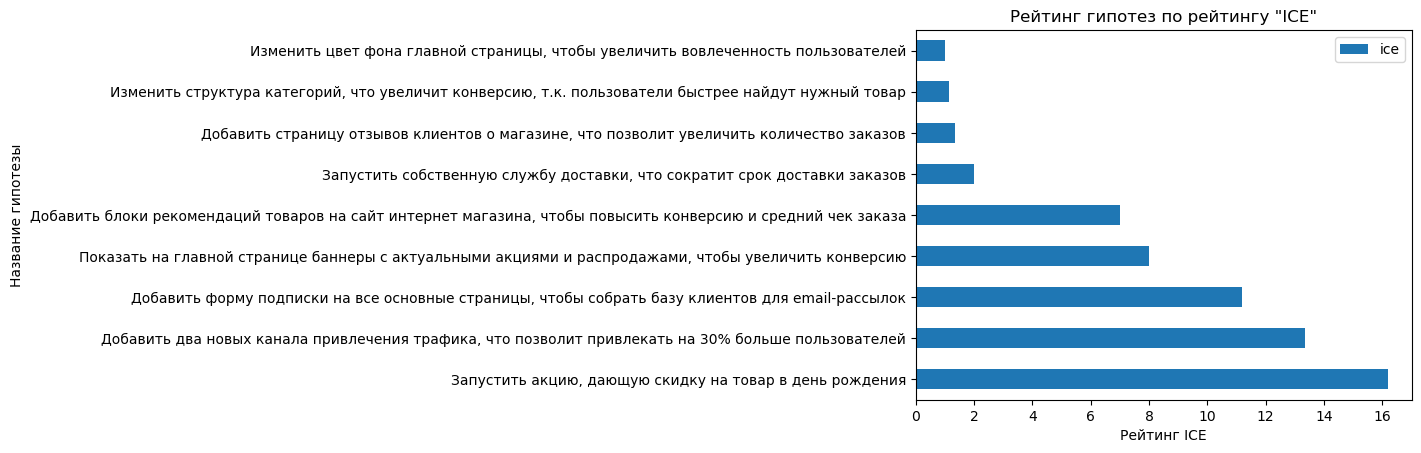

In [30]:
hypothesis[['hypothesis', 'ice']].set_index('hypothesis').plot(kind='barh')
plt.xlabel('Рейтинг ICE')
plt.ylabel('Название гипотезы')
plt.title('Рейтинг гипотез по рейтингу "ICE"')
plt.show()

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета

Формула для нахождения RICE: <BR>
RICE = reach * impact * confidence / efforts

In [33]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis = hypothesis.sort_values(by='rice', ascending=False)
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


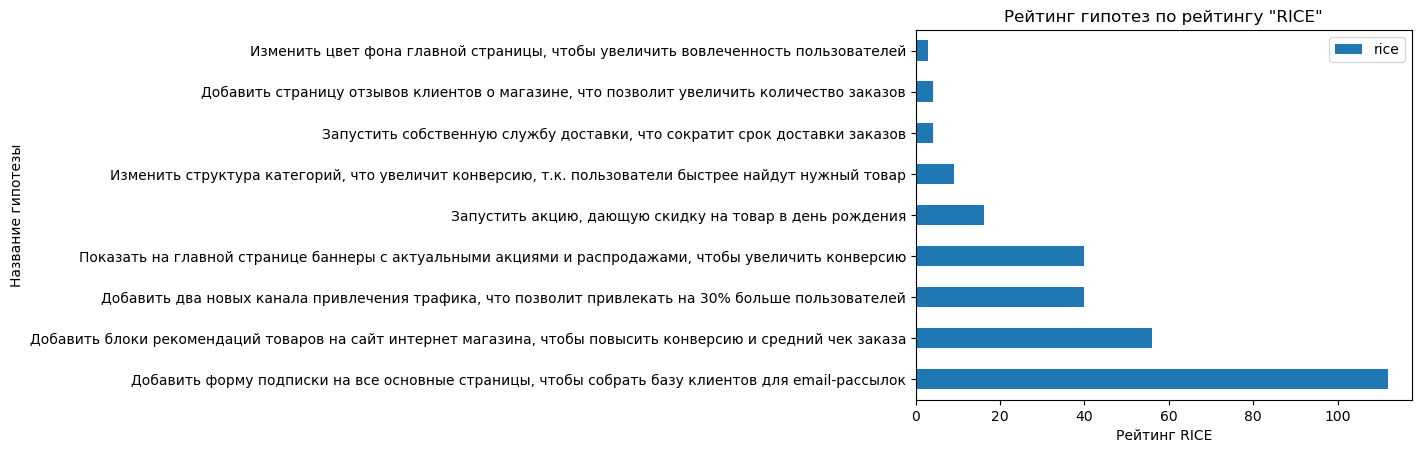

In [34]:
hypothesis[['hypothesis', 'rice']].set_index('hypothesis').plot(kind='barh')
plt.xlabel('Рейтинг RICE')
plt.ylabel('Название гипотезы')
plt.title('Рейтинг гипотез по рейтингу "RICE"')
plt.show()

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло
При изменении расчета рейтинга с ICE на RICE изменились приоритетные гипотезы. Так в рейтинге ICE доминировала гипотеза "Запустить акцию, дающую скидку на товар в день рождения", а в рейтинге RICE – "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Изменение приоритизации произошло из-за различии в формулах расчета рейтинга. Так в формуле RICE учитывается охват, а в формуле ICE – нет

## Часть 2. Анализ A/B-теста

### Проверка на наличие пользователей, попавших в обе группы

Для анализа нам потребуется датафрейм orders, где указаны id

In [39]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [40]:
check_a = orders[orders['group'] == 'A']
group_a = check_a['visitorid'].unique()
check_a['visitorid'].nunique()

503

In [41]:
check_b = check_a = orders[orders['group'] == 'B']
group_b = check_b['visitorid'].unique()
check_b['visitorid'].nunique()

586

In [42]:
common_ids = [] #пустой лист
for user_id in group_a: #цикл для проверки одинаковых id в разных группах
    if user_id in group_b:
        common_ids.append(user_id)
len(common_ids) #количество одинаковых id пользователей в разных группах

58

Для того, чтобы результаты теста отобразились хорошо, не было пересекающихся пользователей, необходимо исключить повторяющихся в обех группах пользователей

In [44]:
orders = orders[~orders['visitorid'].isin(common_ids)]
orders.shape[0]

1016

In [45]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [46]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [47]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения

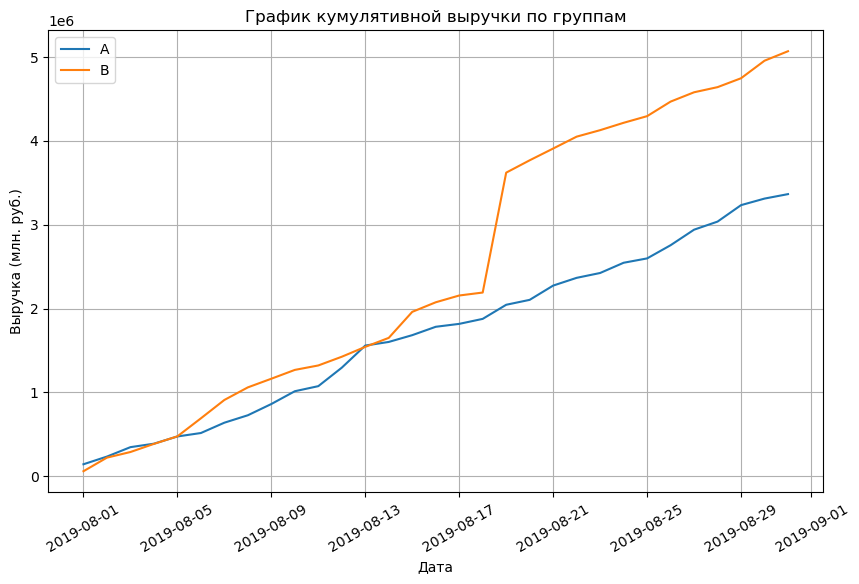

In [49]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(10,6))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.grid(True)
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка (млн. руб.)')
plt.xticks(rotation=30, horizontalalignment="center")
plt.legend() 
plt.show()

#### Вывод "Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения"
Анализируя график кумулятивной выручки по группам, видно, что группа B доминирует над группой A почти с самого начала, однако у группы B заметен резкий скачок вверх – скорее всего, там присутствует аномальное значение или выброс

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения

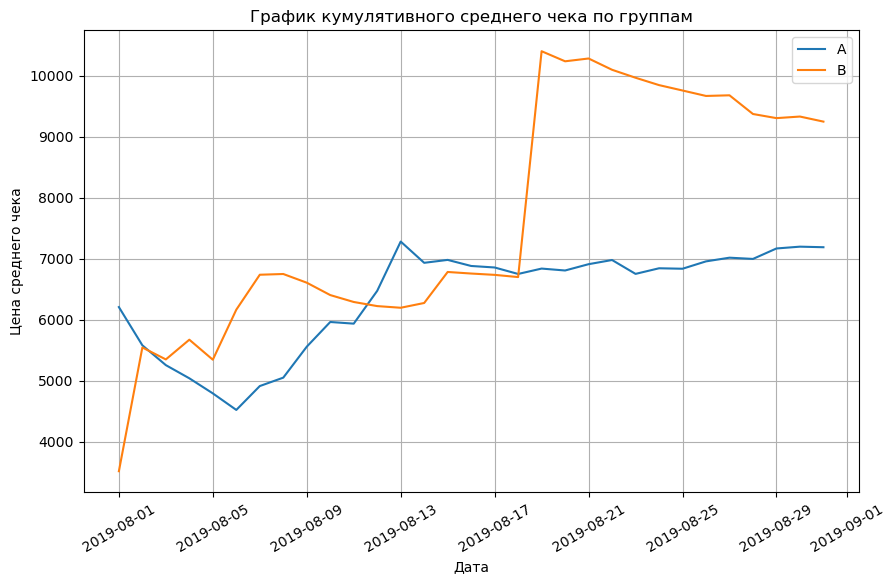

In [52]:
plt.figure(figsize=(10,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.grid(True)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Цена среднего чека')
plt.xticks(rotation=30)
plt.legend() 
plt.show()

#### Вывод "Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения"
График кумулятивной выручки показывает, что в первой половине периода средний чек в группе "B" в основном выше, однако в некоторые даты, такие как начало августа и 12-14 августа, средний чек в группе "A" также превышает показатель группы "B". Впоследствии средний чек группы "B" стабильно остается выше. В то же время на графике видно значительное влияние аномального значения, которое привело к резкому росту среднего чека в группе "B". Это произошло 19 августа, после чего средний чек в группе "B" начал постепенно снижаться, тогда как в группе "A" он с 18 августа начал очень медленно расти

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения

C:\Users\HP\AppData\Local\Temp\ipykernel_10584\3403097581.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


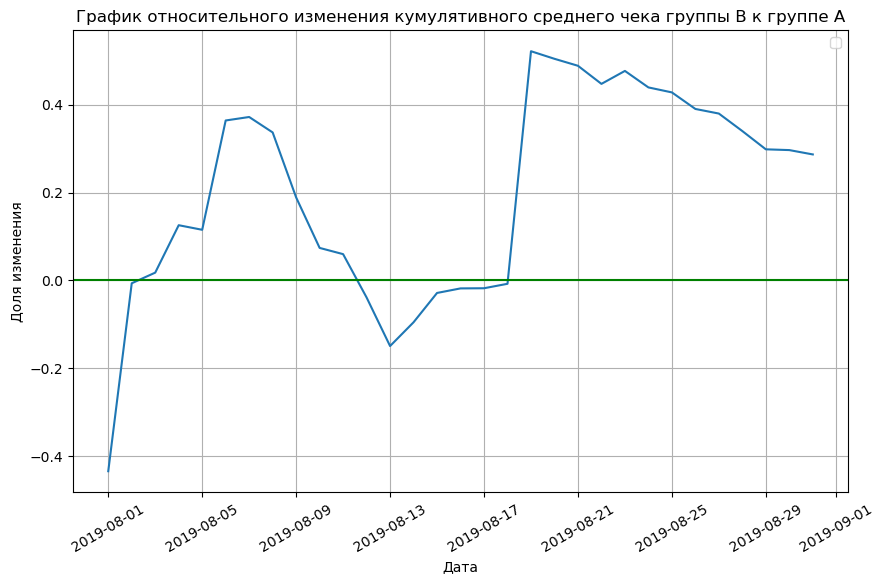

In [55]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,6))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='green', linestyle='-')
plt.grid(True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Доля изменения')
plt.xticks(rotation=30)
plt.legend() 
plt.show()

#### Вывод "Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения"
В первые дни наблюдается значительная волатильность. Средний чек группы B по сравнению с группой A сначала снижается, затем резко увеличивается, и снова уменьшается. Это может указывать на непостоянство поведения пользователей или влияние небольших выборок на начальных этапах. После колебаний в начале августа, с 5 по 10 августа, наблюдается тенденция к увеличению среднего чека в группе B по сравнению с группой A. Это может указывать на рост числа заказов с высокими чеками в группе B. В период с 12 по 14 августа происходит резкое увеличение среднего чека в группе B, что может быть связано с аномально высокими заказами. После этого пика следует стремительное снижение, что может указывать на уменьшение количества крупных заказов или снижение активности в группе B. Начиная с 19 августа, средний чек группы B начинает снижаться, что может быть связано с аномально высоким заказом в этот день. В то же время, в группе A наблюдается постепенный рост среднего чека. В конце августа и начале сентября видно общее снижение относительного изменения среднего чека группы B

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения

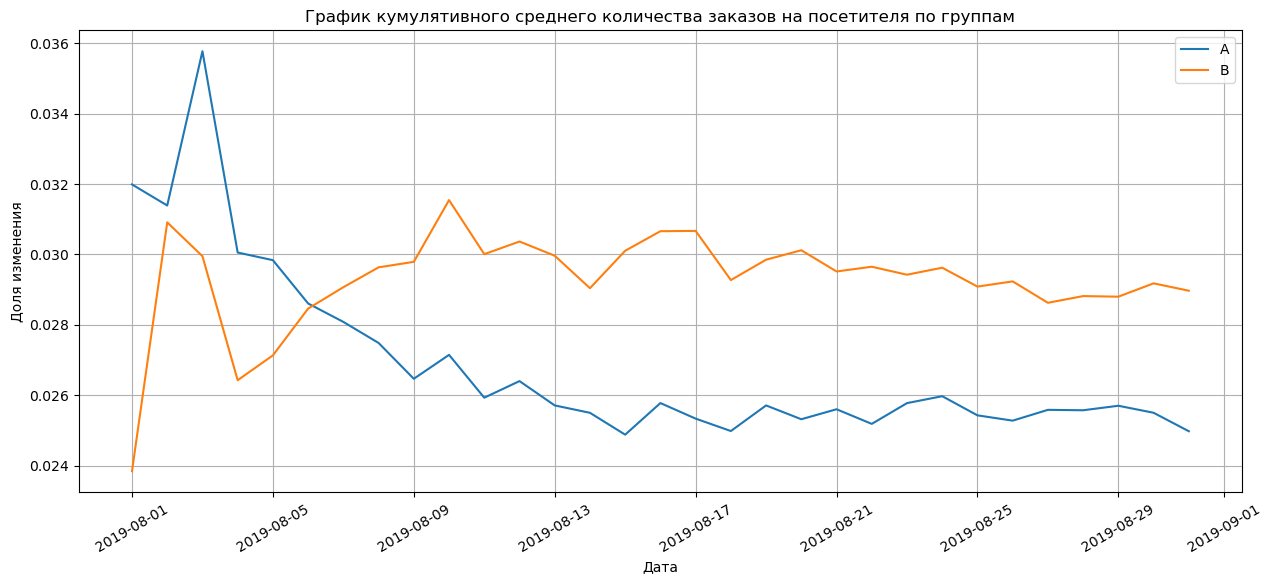

In [58]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,6))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.grid(True)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Доля изменения')
plt.xticks(rotation=30)
plt.legend() 
plt.show()

#### Вывод "Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения"
Конверсия группы B выглядит лучше конверсии группы A, хотя изначально A-конверсия была в несколько раз лучше B-конверсии примерно до 6 августа 

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения

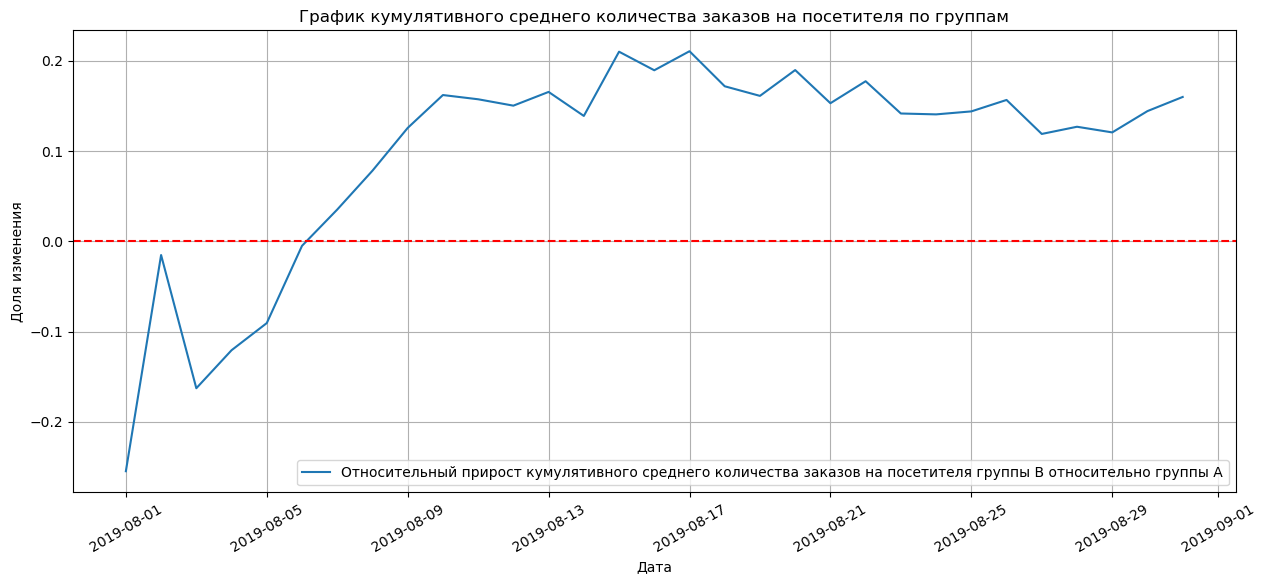

In [61]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,6))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Доля изменения')
plt.xticks(rotation=30)
plt.legend() 
plt.show()

#### Вывод "Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения"
Группа B показывает результаты гораздо лучше, чем группа A (на пике – чуть больше, чем на +20%). Однако важно отметить сильную волатильность в начале эксперимента, связанную из-за малого числа выборки

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения

*Подсчитаем количество заказов по пользователям и посмотрим на результат*

In [65]:
ordersByUsers = orders.groupby('visitorid', as_index=False).agg({'transactionid':'nunique'}).rename(columns={'transactionid':'orders'})

ordersByUsers.sort_values(by='orders', ascending=False).head()

,visitorid,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


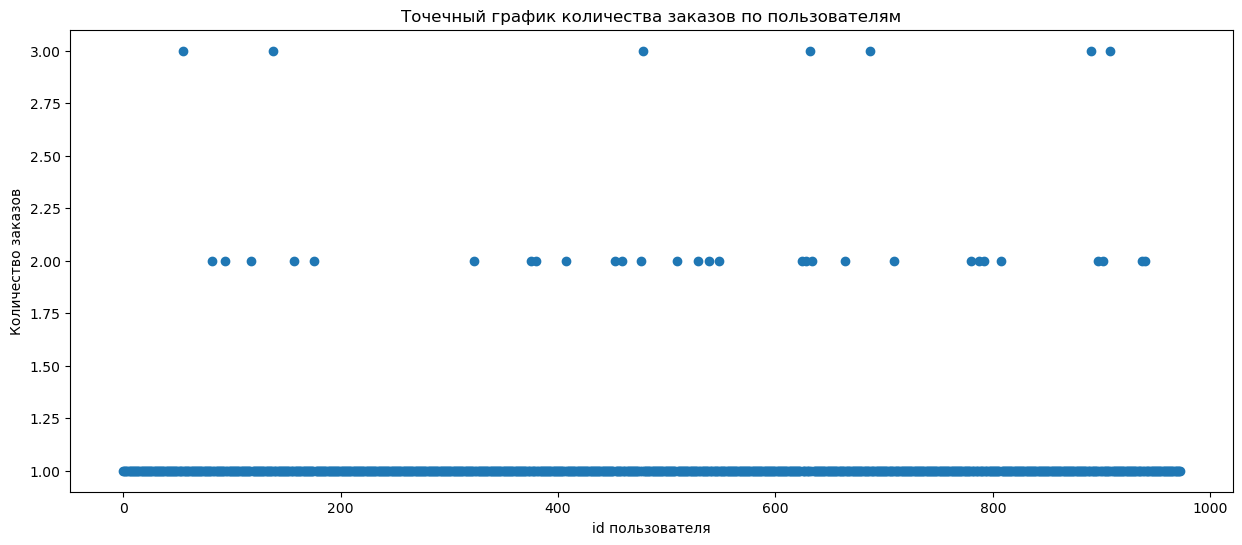

In [66]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,6))

plt.scatter(x_values, ordersByUsers['orders']) 

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('id пользователя')
plt.ylabel('Количество заказов')
plt.show()

#### Вывод "Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения" 
Много пользователей с 1 заказом, менее – с 2 заказами, ещё меньше – с 3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. Нужно изучать, анализировать данные дальше

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей

In [69]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

#### Вывод "Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей"
Не более 5% пользователей оформляли больше, чем 1 заказов, и 1% пользователей заказывали более двух раз. Разумно выбрать 2 заказа на одного пользователя (99 процентиль) за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. Удалением таких строк займёмся далее

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения

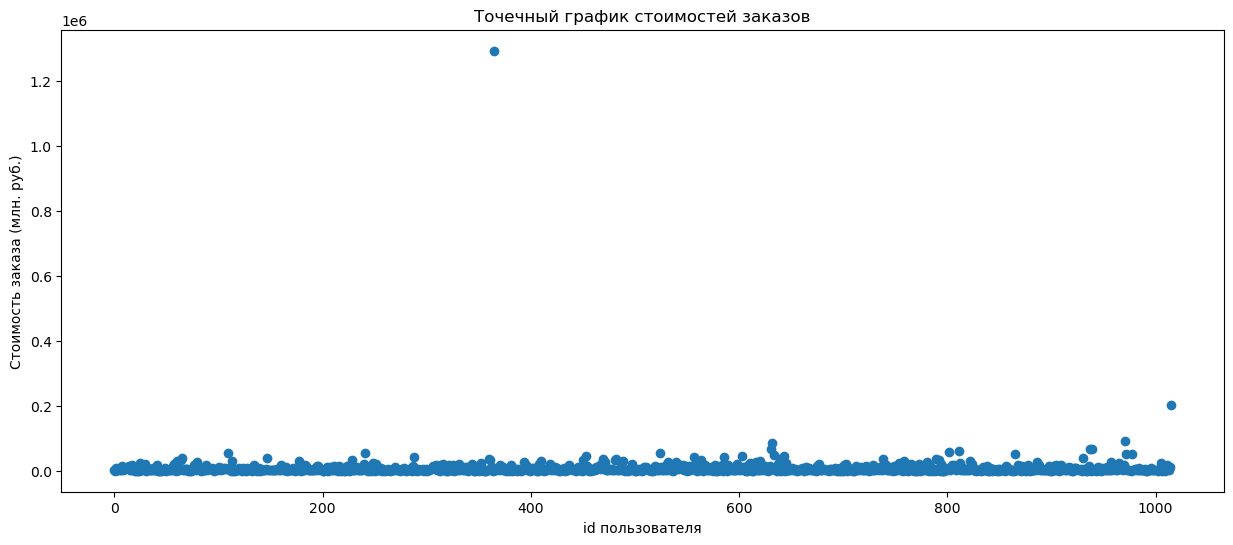

In [72]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15,6))

plt.scatter(x_values, orders['revenue']) 

plt.title('Точечный график стоимостей заказов')
plt.xlabel('id пользователя')
plt.ylabel('Стоимость заказа (млн. руб.)')
plt.show()

#### Вывод "Постройте точечный график стоимостей заказов. Сделайте выводы и предположения"
Заметны как минимум два больших аномальных выброса. Скорее всего, именно из-за них на графиках выше произошли резкие "скачки"

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов

In [75]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

#### Вывод "Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов"
Не более 5% пользователей оформляли заказы на суммму более 26785 рублей, и 1% пользователей заказывали более 53904 рублей. Выберем в качестве верхней границы заказы с 99-м процентилем от суммы заказа (53904 рублей)

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения

Сформулируем гипотезы: <br> 
**Нулевая (H0)**: различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет<br> 
**Альтернативная (H1)**: различия в среднем количестве заказов на посетителя между группами по «сырым» данным есть

*Соберем все данные в одну таблицу*

In [80]:
orders.head(1)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей. Начнём с подготовки данных

In [82]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


 <br> **Напомним названия столбцов данных:** <br>
`date` — дата; <br>
`ordersPerDateA` — количество заказов в выбранную дату в группе A; <br>
`revenuePerDateA` — суммарная выручка в выбранную дату в группе A; <br>
`ordersPerDateB` — количество заказов в выбранную дату в группе B; <br>
`revenuePerDateB` — суммарная выручка в выбранную дату в группе B; <br>
`ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A; <br>
`revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A; <br> 
`ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B; <br>
`revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B; <br>
`visitorsPerDateA` — количество пользователей в выбранную дату в группе A; <br>
`visitorsPerDateB` — количество пользователей в выбранную дату в группе B; <br>
`visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A; <br>
`visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами `['userId', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

In [85]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни

In [87]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('alpha =', 0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный показатель "B" и "A" = {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05
p-value = 0.011
Относительный показатель "B" и "A" = 0.160


#### Вывод "Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения"
Значение p-value (0.011) меньше, чем значение alpha (0.05), значит, нулевая гипотеза "различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет" отвержена. Различия в среднем количестве заказов между группами присутствуют. Группа B преобладает над группой A на 16%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения

Сформулируем гипотезы: <br> 
**Нулевая (H0)**: различий в среднем чеке заказа между группами по «сырым» данным нет <br> 
**Альтернативная (H1)**: различия в среднем чеке заказа между группами по «сырым» данным есть

In [91]:
print('alpha =', 0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный показатель "B" и "A" = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

alpha = 0.05
p-value = 0.829
Относительный показатель "B" и "A" = 0.287


#### Вывод "Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения"
Значение p-value (0.829) больше, чем значение alpha (0.05), значит, нулевая гипотеза "различий в среднем чеке заказа между группами нет" верна и не может быть отвержена, то есть статистически значимых различий. Однако есть относительный выйгрыш: группа B преобладает над группой A по сумме среднего чека на 28.7%. Наблюдаемое различие в 28.7% не является статистически значимым

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения

Возвращаясь к показателям процентилей, узнаем, сколько всего аномальных пользователей

In [95]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Датасет аномальных пользователей (первые 5 строк):')
display(abnormalUsers.head(5))
print('Количество аномальных пользователей:')
abnormalUsers.shape[0]

Датасет аномальных пользователей (первые 5 строк):


1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64

Количество аномальных пользователей:


16

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [97]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

Сформулируем гипотезы: <br> 
**Нулевая (H0)**: различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет <br> 
**Альтернативная (H1)**: различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть

In [100]:
print('alpha =', 0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный показатель "B" и "A" = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha = 0.05
p-value = 0.007
Относительный показатель "B" и "A" = 0.189


#### Вывод "Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения"
Значение p-value (0.07) меньше, чем значение alpha (0.05), значит, нулевая гипотеза "статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет" отвержена. Различия в среднем количестве заказов на посетителя между группами присутствуют. Группа B в среднем количестве заказов на посетителя заказала больше, чем из группы A на 18.9% (в "сырых" данных группа B выигрывала над группой A на 16%). Данное различие не явлется статистически значимым

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения

Сформулируем гипотезы: <br> 
**Нулевая (H0)**: различий в среднем чеке заказа между группами по «очищенным» данным нет <br> 
**Альтернативная (H1)**: различия в среднем чеке заказа между группами по «очищенным» данным есть

In [104]:
print('alpha =', 0.05)
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный показатель "B" и "A" = {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05
p-value = 0.788
Относительный показатель "B" и "A" = -0.032


#### Вывод "Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения"
Значение p-value (0.788) больше, чем значение alpha (0.05), значит, нулевая гипотеза "статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет" верна и не может быть отвержена. Однако есть относительный проигрыш группы B: группа B уступает группе A по сумме среднего чека на 3.2%. Различие в 3.2% не является статистически значимым

### Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест

Промежуточные выводы по "A/B" тестам: <br>
- Значение p-value (0.017) меньше, чем значение alpha (0.05), значит, нулевая гипотеза "различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет" отвержена. Различия в среднем количестве заказов между группами присутствуют. Группа B преобладает над группой A на 16%. Данное различие не явлется статистически значимым
- Значение p-value (0.01) меньше, чем значение alpha (0.05), значит, нулевая гипотеза "различий различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет" отвержена. Различия в среднем количестве заказов на посетителя между группами присутствуют. Группа B в среднем количестве заказов на посетителя заказала больше, чем из группы A на 18.9% (в "сырых" данных группа B выигрывала над группой A на 16%). Данное различие не явлется статистически значимым
- Значение p-value (0.729) больше, чем значение alpha (0.05), значит, нулевая гипотеза "различий в среднем чеке заказа между группами по «сырым» данным нет" верна и не может быть отвержена. Группа B преобладает над группой A по сумме среднего чека на 28.7%. Данное различие не явлется статистически значимым
- Значение p-value (0.788) больше, чем значение alpha (0.05), значит, нулевая гипотеза "статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет" верна и не может быть отвержена. Однако есть относительный проигрыш группы B: группа B уступает группе A по сумме среднего чека на 3.2%. Данное различие не явлется статистически значимым

#### Вывод "Примите решение по результатам теста и объясните его"
Исходя из всех проведенных "A/B" тестов можно выделить следующие результаты:
- Статистически значимые различия в среднем количестве заказов на посетителя между группами по «сырым» и «очищенным» данным присутствуют. В «сырых» данных гуппа B преобладает над группой A на 16%, а в «очищенных» данных группа B в среднем количестве заказов на посетителя заказала больше, чем из группы A на 18.9%

- Статистически значимого различия различий в среднем чеке заказа между группами по «сырым» и «очищенным» данным нет. В «сырых» данных группа B преобладает над группой A по сумме среднего чека на 28.7%, однако в «очищенных» данных группа B уступает группе A по сумме среднего чека на 3.2% – это связано с большими аномалиями или выбросами (A/B тест позволил выявить эти нюансы)

Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы B над группой A, тк группа B гораздо эффективнее показала свою конверсию, хоть и средние чеки обеих групп примерно равны (отличаются на два процента в пользу группы А). В долгосрочной перспективе группа B может дать хорошие плоды в сторону увеличения среднего чека благодаря своей относительно высокой конверсии